### Project idea

I arrived in Kraków a few months back and during my wanderings I noticed two football stadiums on either side of [Błonia](https://pl.wikipedia.org/wiki/B%C5%82onia_(Krak%C3%B3w)) separated by just 700 metres. I didn't know anything about either of these clubs but was told that the rivalry between them is intense. The so-called Holy War between Wisła Kraków and KS Cracovia has even featured in documentaries by Ross Kemp and Danny Dyer. 

I thought I would try to use [Structured Query Language](https://en.wikipedia.org/wiki/SQL) more commonly known as SQL to find out a bit more. To get the ball rolling I first needed to find a data source.


### European Soccer Database

The [European Soccer Database](https://www.kaggle.com/datasets/hugomathien/soccer) includes:
    
- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches
        

The information is spread across 7 tables:

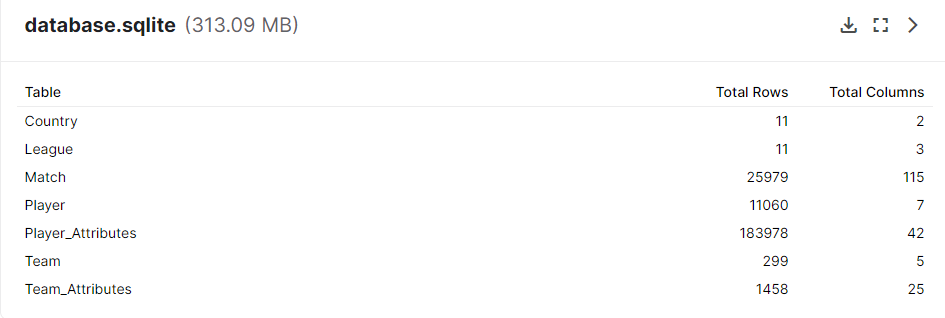
         

A very helpful diagram of the database schema is included below, as provided by [Felipe Mahlmeister](https://github.com/fmahlmeister). This shows the links between the tables which will help us construct the appropriate JOIN queries to get the information we need.

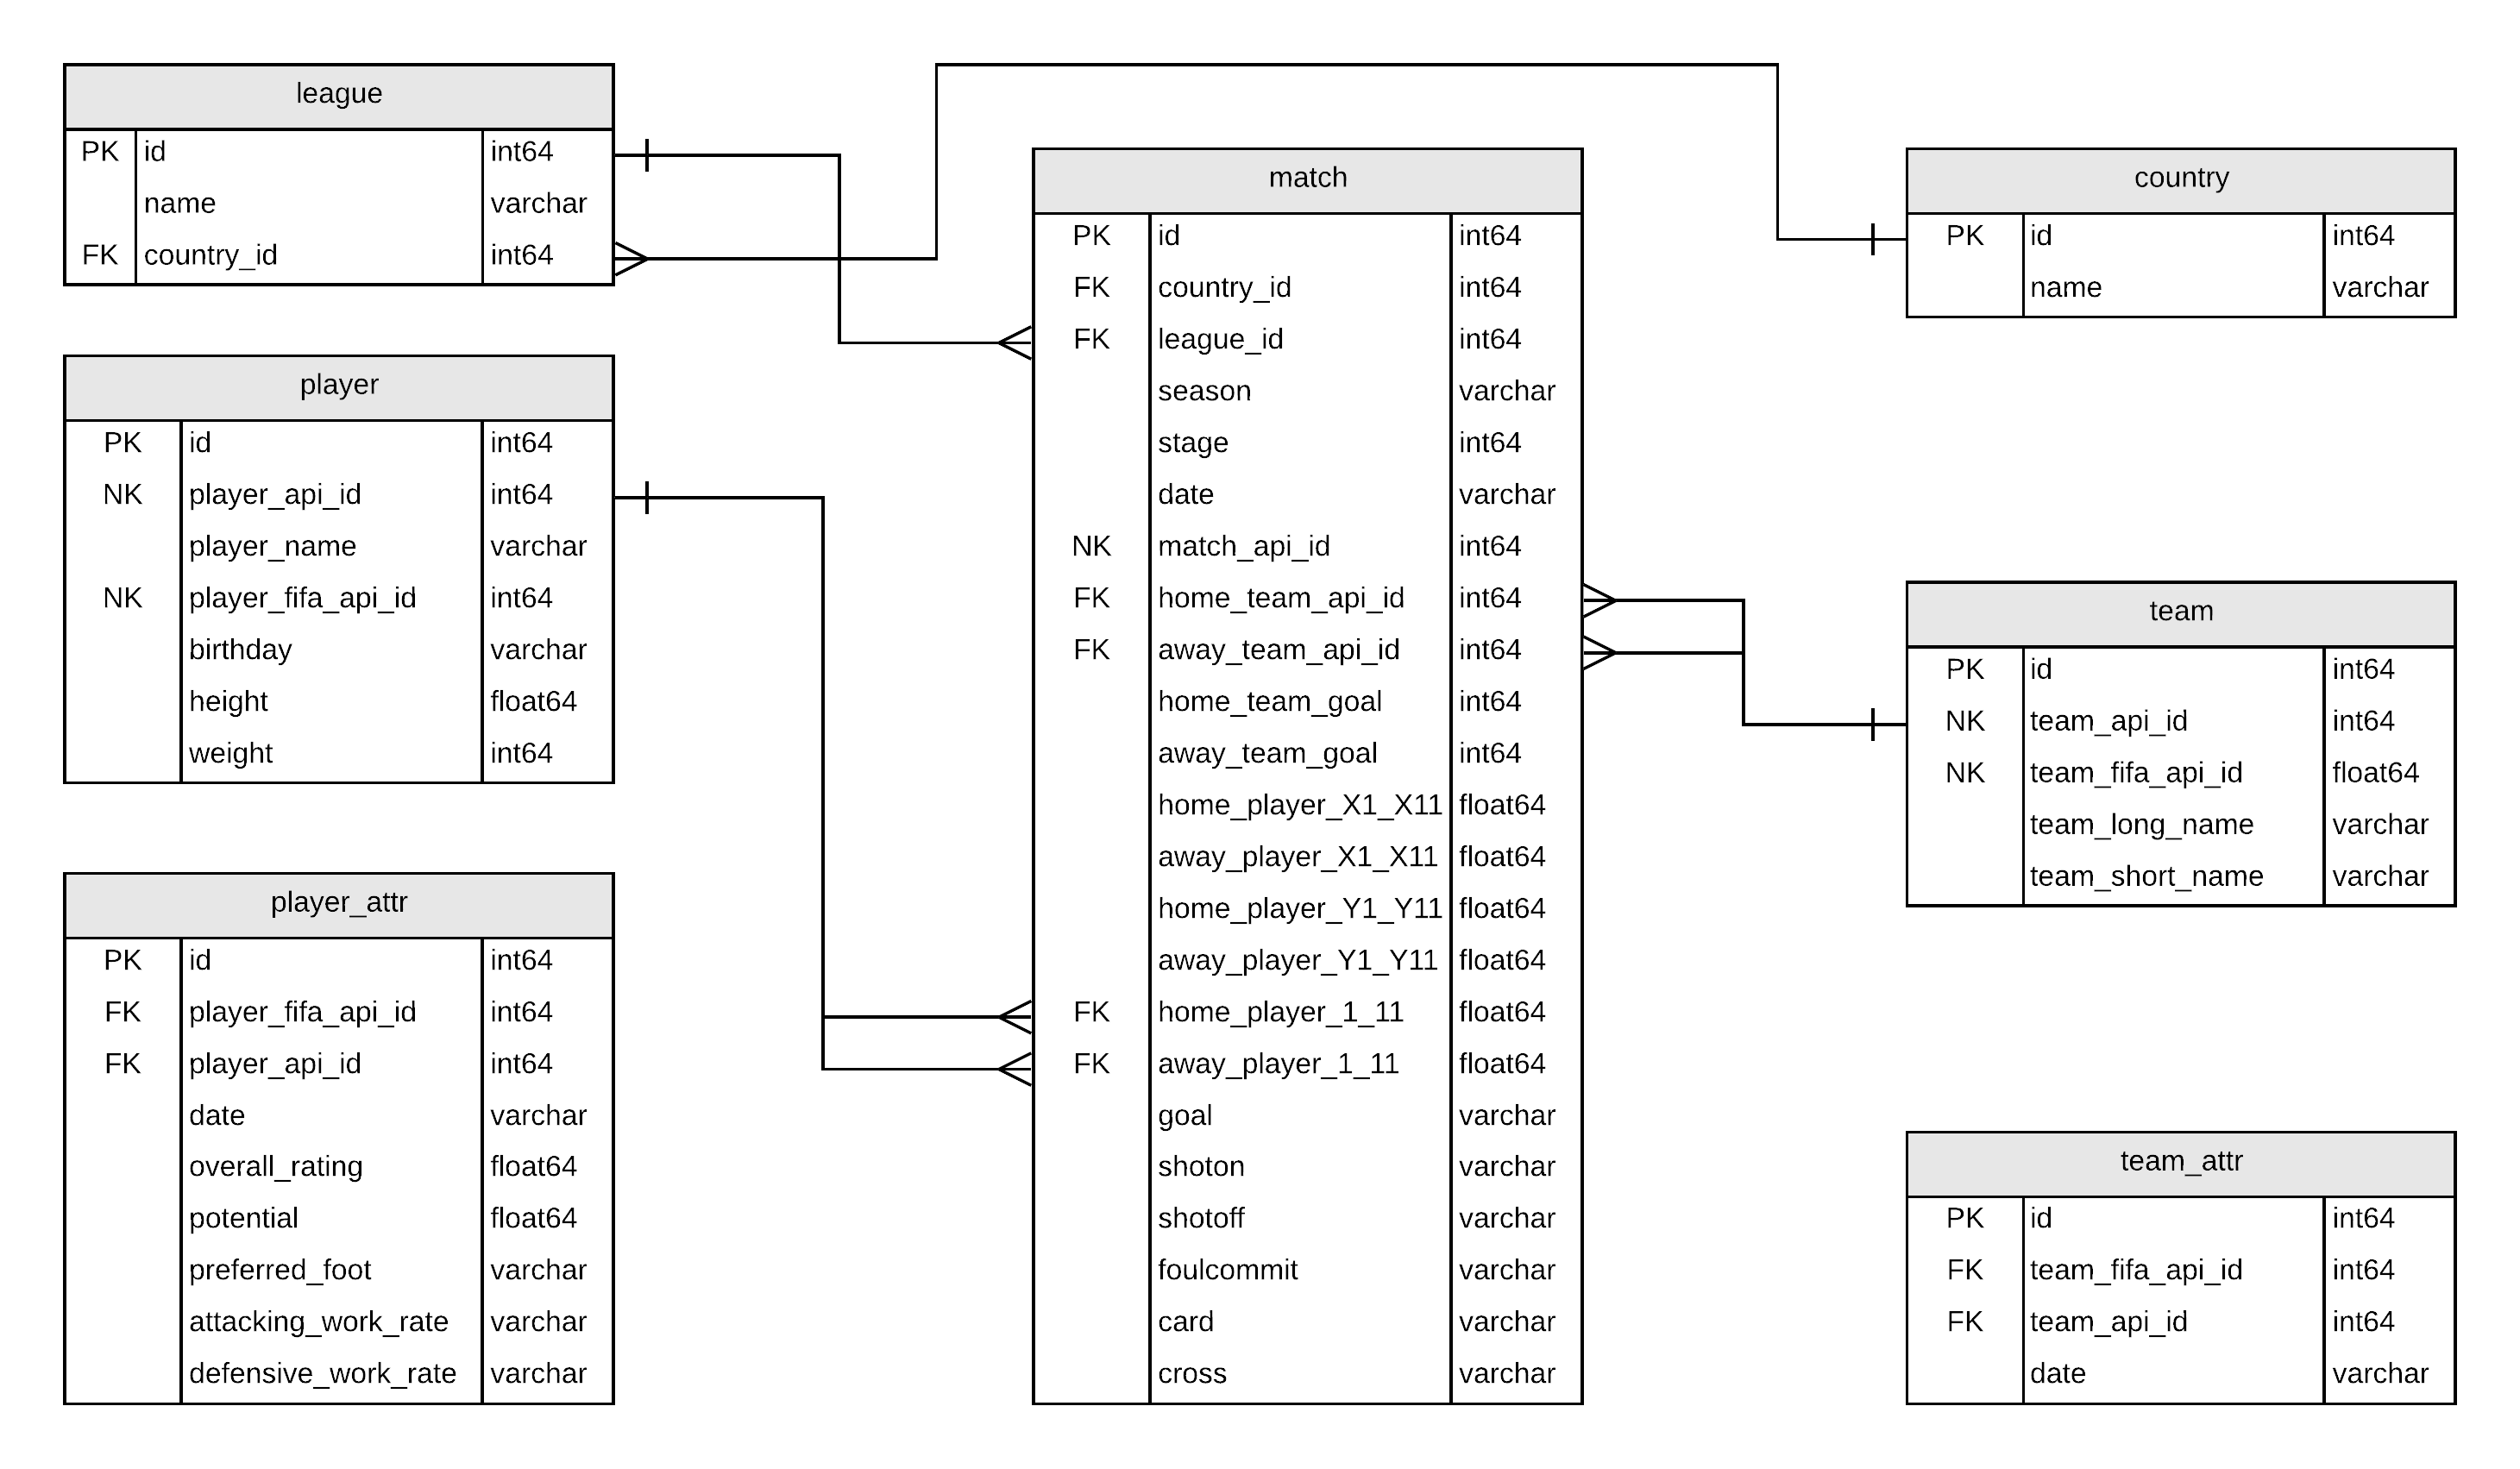

### Joining data using SQL 

JOIN is used when you want to connect two tables to each other. It works when you have a common key in each of them. Understanding the concept of Keys is crucial for connecting (joining) between datasets (tables). A key is uniquely identifies each record (row) in a table. It can consinst of one value (cell) - usually ID, or from a combination of values that are unique in the table.

When joining between different tables, you must:

- Decide what type of join to use. The most common are:

     - (INNER) JOIN - keep only records that match the condition (after the ON) in both the tables, and records in both tables that do not match wouldn't appear in the output
     - LEFT JOIN - keep all the values from the first (left) table - in conjunction with the matching rows from the right table. The columns from the right table, that don't have a matching value in the left, would have NULL values.
     
- Specify the common value that is used to connect the tables (the ID of the country in that case).
- Make sure that at least one of the values is a key in its table. In our case, it's the Country.id. The League.country_id is not unique, as there can be more than one league in the same country

JOINs, and using them incorrectly, is the most common and dangerous mistake when writing complicated queries.

### Query Run Order

It is very important to understand the order in which SQL code runs:

- SELECT
- FROM
- JOIN
- WHERE
- GROUP BY
- HAVING
- ORDER BY
- LIMIT

You can think of it as a two part process: First, create a new temporary table in the memory:

- Define which tables to use, and connect them (FROM + JOIN)
- Keep only the rows that apply to the conditions (WHERE)
- Group the data by the required level (if need) (GROUP BY)
- Order the output of the new table (ORDER BY)
- Add more conditions that would filter the new created table (HAVING)
- Limit to a number of rows - based on the sorting and the having filtering (LIMIT)

### Sub Queries and Functions

Using subqueries is an essential tool in SQL, as it allows the manipulation of data in advanced ways without the need of any external scripts, and is especially important when tables are structured in such a way that they can't be joined directly.

Once tables have the same keys, we can join them together (think of the subquery as any other table, only temporary), knowing that we won't have duplicated rows after the join.

Conditional functions are an important tool for data manipulation. While the IF statement is very popular in other languages, SQLite does not support it, and instead uses CASE + WHEN + ELSE statements. 


## Accessing SQLite Databases Using Python and Pandas

After downloading the database file which is in .sqlite format. my first question was:

- is it even possible to work with database data using Python within Jupyter Notebooks?

The good news is, yes it is possible :) After quite a bit of digging I found [this article](https://datacarpentry.org/python-ecology-lesson/09-working-with-sql/index.html) which gave me a platform to make a start on this project idea.
                                                                                     

In [3]:
# Install the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

### The sqlite3 module

SQLite is a C library that provides a lightweight disk-based database that doesn’t require a separate server process and allows accessing the database using a nonstandard variant of the SQL query language. Some applications can use SQLite for internal data storage. It’s also possible to prototype an application using SQLite and then port the code to a larger database such as PostgreSQL or Oracle.

The [sqlite3 module](https://docs.python.org/3/library/sqlite3.html) was written by Gerhard Häring and provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249, and requires SQLite 3.7.15 or newer.


In [4]:
# Create a SQL connection to our downloaded SQLite database file
con = sqlite3.connect("Data/database.sqlite")

Basically you can run SQL queries just as you would within a database, and then convert the results to a pandas DataFrame for further analysis and presentation. Let's have a look at each of the 7 tables in turn to establish what sort of information is included:

## Table 1 - Country

In [318]:
# Create a pandas DataFRame of the Country table
country = pd.read_sql_query('''SELECT * 
                            FROM Country'''
                            ,con)

# Verify that result of SQL query is stored in the dataframe
print(country)

       id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland


So, the database covers 11 countries and the country id for Poland is 15722.

## Table 2 - League

In [319]:
# Create a pandas DataFrame of the League table
leagues = pd.read_sql_query('''SELECT * 
                            FROM League'''
                            ,con)

# Verify that result of SQL query is stored in the dataframe
print(leagues)

       id  country_id                      name
0       1           1    Belgium Jupiler League
1    1729        1729    England Premier League
2    4769        4769            France Ligue 1
3    7809        7809     Germany 1. Bundesliga
4   10257       10257             Italy Serie A
5   13274       13274    Netherlands Eredivisie
6   15722       15722        Poland Ekstraklasa
7   17642       17642  Portugal Liga ZON Sagres
8   19694       19694   Scotland Premier League
9   21518       21518           Spain LIGA BBVA
10  24558       24558  Switzerland Super League


And, the id for the League name is the same as the country_id - for the Polish Ekstraklasa this is 15722.

## Table 3 - Match

In [62]:
# Create a pandas DataFrame of the Match table
matches = pd.read_sql_query('''SELECT * 
                            FROM Match'''
                            ,con)

# Verify that result of SQL query is stored in the dataframe
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


As you can see we have a LOT of data here - 115 columns! Let's focus on the ***season*** column for the moment. From the first 5 rows we can see that we have information starting from the 2008/2009 season. Let's check how many seasons we have data for:

In [321]:
matches.season.unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

## Table 4 - Player

In [322]:
players = pd.read_sql_query('''SELECT * 
                            FROM Player'''
                            ,con)

# Verify that result of SQL query is stored in the dataframe
print(players)

          id  player_api_id          player_name  player_fifa_api_id  \
0          1         505942   Aaron Appindangoye              218353   
1          2         155782      Aaron Cresswell              189615   
2          3         162549          Aaron Doran              186170   
3          4          30572        Aaron Galindo              140161   
4          5          23780         Aaron Hughes               17725   
...      ...            ...                  ...                 ...   
11055  11071          26357       Zoumana Camara                2488   
11056  11072         111182         Zsolt Laczko              164680   
11057  11073          36491            Zsolt Low              111191   
11058  11074          35506  Zurab Khizanishvili               47058   
11059  11075          39902   Zvjezdan Misimovic              102359   

                  birthday  height  weight  
0      1992-02-29 00:00:00  182.88     187  
1      1989-12-15 00:00:00  170.18     146  


## Table 5 - Player attributes

In [61]:
player_attributes = pd.read_sql_query('''SELECT * 
                                      FROM Player_Attributes'''
                                      ,con)

# Verify that result of SQL query is stored in the dataframe
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Table 6 - Teams

In [66]:
# Create a pandas DataFRame of the Team table
teams = pd.read_sql_query('''SELECT * 
                          FROM Team'''
                          ,con)

# Verify that result of SQL query is stored in the dataframe
print(teams)

        id  team_api_id  team_fifa_api_id      team_long_name team_short_name
0        1         9987             673.0            KRC Genk             GEN
1        2         9993             675.0        Beerschot AC             BAC
2        3        10000           15005.0    SV Zulte-Waregem             ZUL
3        4         9994            2007.0    Sporting Lokeren             LOK
4        5         9984            1750.0   KSV Cercle Brugge             CEB
..     ...          ...               ...                 ...             ...
294  49479        10190             898.0       FC St. Gallen             GAL
295  49837        10191            1715.0             FC Thun             THU
296  50201         9777             324.0         Servette FC             SER
297  50204         7730            1862.0  FC Lausanne-Sports             LAU
298  51606         7896               NaN              Lugano             LUG

[299 rows x 5 columns]


So we can see that the Team table has information about 299 teams. It would be useful to see the breakdown of the number of teams from each country league. It's not possibe to do this using the information contained in the Team table alone. We will need to join two tables together to obtain this information:

In [67]:
# Join the Team table to the Match table using an INNER JOIN and create a pandas DataFrame
team_league = pd.read_sql_query('''SELECT DISTINCT t.team_api_id AS team_id, t.team_long_name AS team_name, l.name AS league 
                                FROM Team AS t 
                                JOIN Match AS m ON t.team_api_id = m.home_team_api_id 
                                JOIN League AS l ON l.country_id = m.country_id''',con)

# Verify that result of SQL query is stored in the dataframe
team_league.head(10)

,team_id,team_name,league
0,1601,Ruch Chorzów,Poland Ekstraklasa
1,1773,Oud-Heverlee Leuven,Belgium Jupiler League
2,1957,Jagiellonia Białystok,Poland Ekstraklasa
3,2033,S.C. Olhanense,Portugal Liga ZON Sagres
4,2182,Lech Poznań,Poland Ekstraklasa
5,2183,P. Warszawa,Poland Ekstraklasa
6,2186,Cracovia,Poland Ekstraklasa
7,4049,Tubize,Belgium Jupiler League
8,4064,Feirense,Portugal Liga ZON Sagres
9,4087,Évian Thonon Gaillard FC,France Ligue 1


Great, now we have the required information to show the number of teams split across the 11 distinct leagues. Let's use pandas to sort and group this data and then illustrate graphically using matplotlib:

Text(0.5, 1.0, 'Number of teams per country')

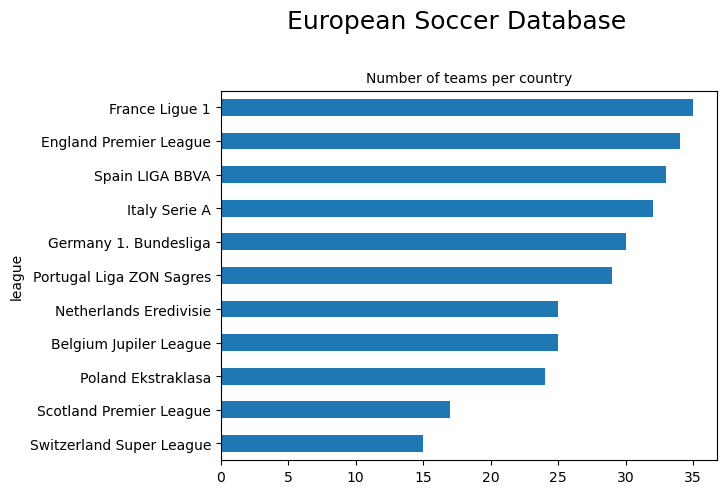

In [68]:
import matplotlib.pyplot as plt

title_string = "European Soccer Database "
subtitle_string = "Number of teams per country"

x = team_league.groupby("league")["team_name"].count().sort_values(ascending=True)
plt.figure()
x.plot(kind='barh')
plt.suptitle(title_string, y=1.05, fontsize=18)
plt.title(subtitle_string, fontsize=10)

In [69]:
team_league.groupby("league")["team_name"].count().sort_values(ascending=False)

league
France Ligue 1              35
England Premier League      34
Spain LIGA BBVA             33
Italy Serie A               32
Germany 1. Bundesliga       30
Portugal Liga ZON Sagres    29
Belgium Jupiler League      25
Netherlands Eredivisie      25
Poland Ekstraklasa          24
Scotland Premier League     17
Switzerland Super League    15
Name: team_name, dtype: int64

There is quite a disparity between the various leagues. The French Ligue 1 has 20 teams (we have data for 35 teams because the dataset covers 8 seasons and accounts for promotions from the lower leagues), whereas the Swiss Super League only has 10 teams. 

## Table 7 - Team attributes

In [70]:
# Create a pandas DataFRame of the Team table
team_attributes= pd.read_sql_query('''SELECT * 
                                   FROM Team_Attributes'''
                                   ,con)

# Verify that result of SQL query is stored in the dataframe
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


## Which Polish teams are included in the database?

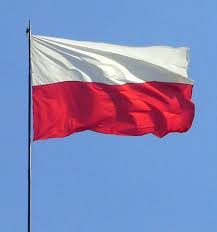

In [330]:
# Subquery filtering list with IN
poland_league = pd.read_sql_query ('''SELECT team_long_name, 
                                   team_short_name AS abbr, 
                                   team_api_id AS team_id 
                                   FROM Team WHERE team_api_id 
                                   IN (SELECT home_team_api_id FROM Match WHERE country_id = 15722)'''
                                   ,con)
poland_league

,team_long_name,abbr,team_id
0,Ruch Chorzów,CHO,1601
1,Jagiellonia Białystok,BIA,1957
2,Lech Poznań,POZ,2182
3,P. Warszawa,PWA,2183
4,Cracovia,CKR,2186
5,Górnik Łęczna,LEC,8019
6,Polonia Bytom,GOR,8020
7,Zagłębie Lubin,ZAG,8021
8,Pogoń Szczecin,POG,8023
9,Widzew Łódź,WID,8024


One or two familiar names there, Lech Poznań, Legia Warszawa. Having recently relocated to Kraków the focus for the rest of this project will be on the two Kraków teams:

- Wisła Kraków
- KS Cracovia

The history of both clubs appears to be colourful. Cracovia received a 5 point deduction in 2020/2021 for alleged match-rigging dating back to 2003/2004, and [this article](https://ryanferguson.co.uk/blogs/football/wisla-krakow-scandal-hooligans-sharks-owners-blaszczykowski) on the history of Wisła Kraków is an entertaining read!

## The Holy War - Święta Wojna

The term "Holy War" refers to the intense rivalry between the two Kraków-based teams; Wisła Kraków and KS Cracovia. In 1906, the establishment of the two first Polish football clubs, Cracovia and Wisła, created a rivalry that now dates back more than 100 years. The term "Holy War" was first used to describe the rivalry of Kraków's Jewish teams, Makkabi and Jutrzenka. A Jutrzenka defender, Ludwik Gintel, who later joined the Cracovia side referred to the derby match against Wisła as the "Holy War". The phrase was incorporated into a song and has since been popular amongst both Wisła and Cracovia fans.

The first recorded Kraków Derby was contested on 20 September 1908, a 1–1 draw.

[Wisła Kraków](https://www.wisla.krakow.pl/) were formed in 1906 and play their football at the Stadion Miejski im. Henryka Reymana which has a capacity of 33,130.

They have 14 league titles in their trophy cabinet, the most recent win was 2010/2011.

<img src="Wisła_Kraków_logo.png" width="200" height ="200"/>   <img src="Wisla stadium.jpg" width="400" height ="400"/>


[KS Cracovia](https://en.wikipedia.org/wiki/MKS_Cracovia) also formed in 1906, are widely considered to be the oldest club in Kraków. They play their football at the Stadion Cracovii im. Józefa Piłsudskiego which has a capacity of 15,016.

They have 5 league titles in their trophy cabinet, however they are getting a bit dusty. The last time they won the title was 1948.


<img src="Cracovia_logo.png" width="200" height ="200"/>   <img src="Cracovia stadium.jfif"  width="400" height ="400"/>


So, what happens when these clubs go toe to toe?! Let's find out by looking at the results for the matches between the bitter rivals over the period of study:

In [69]:
# Use multiple CASE WHEN THEN queries to obtain outcomes from all matches between Wisła Kraków and Cracovia
derbies = pd.read_sql_query('''SELECT date, season, home_team_api_id, away_team_api_id, home_team_goal,away_team_goal,
                                 CASE WHEN home_team_api_ID = 2186 AND home_team_goal > away_team_goal 
                                 THEN 'KS Cracovia win!'
                                WHEN home_team_api_ID = 2186 AND home_team_goal < away_team_goal 
                                THEN 'Wisła Kraków win!'
                                WHEN home_team_api_id = 10265 AND home_team_goal > away_team_goal
                                THEN 'Wisła Kraków win!'
                                 WHEN home_team_api_id = 10265 AND home_team_goal < away_team_goal
                                THEN 'KS Cracovia win!'
                                ELSE 'Draw' END AS outcome 
                                FROM Match
                                WHERE home_team_api_id = 2186 AND away_team_api_id = 10265
                                OR home_team_api_id = 10265 AND away_team_api_id = 2186'''                                
                            ,con)


<AxesSubplot: ylabel='outcome'>

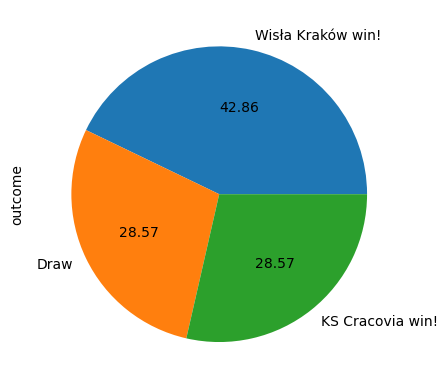

In [70]:
# Create a piechart showing the derby outcomes
derbies['outcome'].value_counts().plot(kind='pie',autopct='%.2f')

In [24]:
derbies

,date,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,outcome
0,2009-03-22 00:00:00,2008/2009,10265,2186,4,1,Wisła Kraków win!
1,2008-08-31 00:00:00,2008/2009,2186,10265,1,1,Draw
2,2009-11-22 00:00:00,2009/2010,10265,2186,0,1,Cracovia win!
3,2010-05-11 00:00:00,2009/2010,2186,10265,1,1,Draw
4,2010-11-05 00:00:00,2010/2011,2186,10265,0,1,Wisła Kraków win!
5,2011-05-15 00:00:00,2010/2011,10265,2186,1,0,Wisła Kraków win!
6,2011-11-06 00:00:00,2011/2012,2186,10265,1,0,Cracovia win!
7,2012-04-30 00:00:00,2011/2012,10265,2186,1,0,Wisła Kraków win!
8,2014-02-23 00:00:00,2013/2014,10265,2186,3,1,Wisła Kraków win!
9,2013-09-21 00:00:00,2013/2014,2186,10265,1,1,Draw


So, Wisła Kraków have the bragging rights for the period of study. The clubs met 14 times (no derby in 2012/2013 due to KS Cracovia being relegated from the top league in 2011/2012) between 2008/2009 and 2015/2016 :

- Wisła Kraków wins = 6
- KS Cracovia wins = 4
- Draws = 4

But of course it's not all about the derby matches. Let's now take a look at how the two Kraków rivals performed overall.

## Wisła Kraków 

<img src="Wisla strip.png" width="250" height ="250"/> 

### 2008/2009 to 2015/2016

#### Gooooooooooool !

In [25]:
# Use a SQL CASE WHEN with SUM query to display a table summarizing goals scored and conceded for each season
# Multiply goals conceded by -1 to allow bi-directional plotting

wisla_krakow_goals = pd.read_sql_query('''SELECT season, SUM(CASE WHEN home_team_api_id = 10265 THEN home_team_goal END) AS home_goals_scored, 
                                       SUM(CASE WHEN away_team_api_id = 10265 THEN away_team_goal END) AS away_goals_scored,
                                       SUM(CASE WHEN home_team_api_id = 10265 THEN away_team_goal END)*-1 AS home_goals_conceded, 
                                       SUM(CASE WHEN away_team_api_id = 10265 THEN home_team_goal END)*-1 AS away_goals_conceded 
                                       FROM Match 
                                       GROUP BY season'''
                                       ,con)

<AxesSubplot: title={'center': 'Wisła Kraków - goals for and against'}, xlabel='season'>

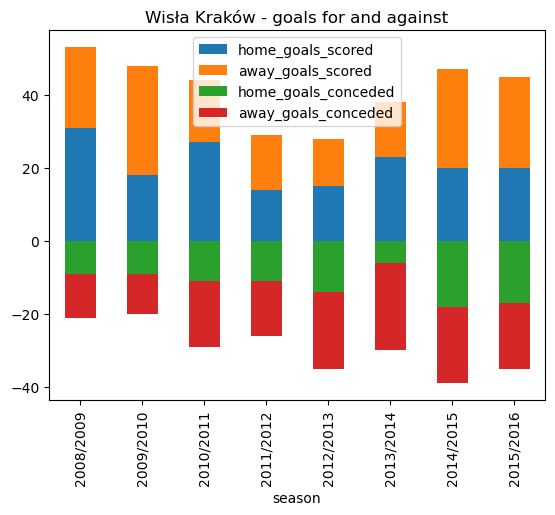

In [26]:
# Plot a bi-directional stacked bar plot showing home and away goals scored and conceded each season
wisla_krakow_goals.plot.bar(x='season', stacked=True, title ='Wisła Kraków - goals for and against')

In [27]:
wisla_krakow_goals

,season,home_goals_scored,away_goals_scored,home_goals_conceded,away_goals_conceded
0,2008/2009,31,22,-9,-12
1,2009/2010,18,30,-9,-11
2,2010/2011,27,17,-11,-18
3,2011/2012,14,15,-11,-15
4,2012/2013,15,13,-14,-21
5,2013/2014,23,15,-6,-24
6,2014/2015,20,27,-18,-21
7,2015/2016,20,25,-17,-18


We have data for all 8 seasons which confirms that they were not relegated from the top flight during the period of study. Generally speaking, for the period of study Wisła Kraków comfortably score more goals than they concede, the exception being season 2012/13 where they scored just 28 goals (only four more than relegated GKS Bełchatów) they finished 7th that year. We can represent the goal 'difference' graphically:

#### Goal difference

<AxesSubplot: title={'center': 'Wisła Kraków - goal difference'}, xlabel='season'>

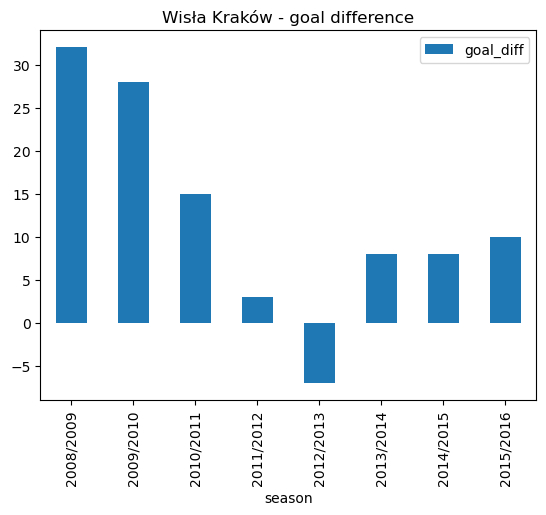

In [28]:
# Add a goal difference column to the wisla_krakow_goals DataFrame
wisla_krakow_goals["goal_diff"] = wisla_krakow_goals["home_goals_scored"] + wisla_krakow_goals["away_goals_scored"] + wisla_krakow_goals["home_goals_conceded"] + wisla_krakow_goals["away_goals_conceded"] 

# Select the season and goal difference columns and plot
wisla_krakow_goal_diff = wisla_krakow_goals[["season", "goal_diff"]]
wisla_krakow_goal_diff.plot.bar(x='season', stacked=False, title ='Wisła Kraków - goal difference')

In [29]:
wisla_krakow_goal_diff

,season,goal_diff
0,2008/2009,32
1,2009/2010,28
2,2010/2011,15
3,2011/2012,3
4,2012/2013,-7
5,2013/2014,8
6,2014/2015,8
7,2015/2016,10


For the period of study Wisła Kraków scored more goals then they conceded, except for the 2012/2013 season.

#### You win some, you lose some

<AxesSubplot: title={'center': 'Wisła Kraków - games won and lost'}, xlabel='season'>

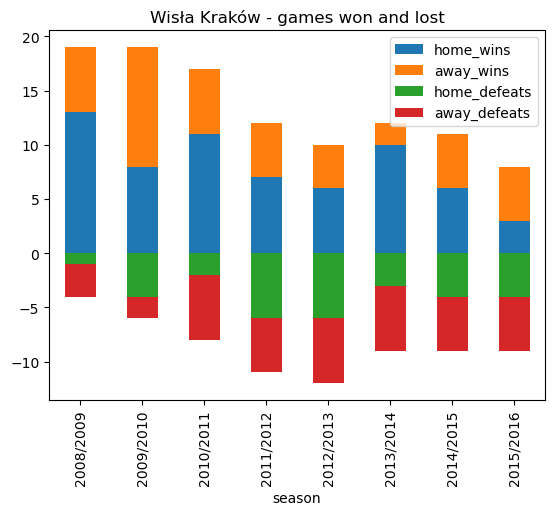

In [30]:
# Run an SQl query using COUNT CASE WHEN to extract home and away games won and lost
wisla_krakow_wins_losses =  pd.read_sql_query('''SELECT season, 
                                              COUNT(CASE WHEN home_team_api_id = 10265 AND home_team_goal > away_team_goal THEN id END) AS home_wins, 
                                              COUNT(CASE WHEN away_team_api_id = 10265 AND away_team_goal > home_team_goal THEN id END) AS away_wins, 
                                              COUNT(CASE WHEN home_team_api_id = 10265 AND home_team_goal < away_team_goal THEN id END) AS home_defeats, 
                                              COUNT(CASE WHEN away_team_api_id = 10265 AND away_team_goal < home_team_goal THEN id END) AS away_defeats 
                                              FROM Match 
                                              GROUP BY season'''
                                              ,con)


# Convert defeats to a negative value - multiply by -1 to enable bi-directional plotting
wisla_krakow_wins_losses.home_defeats = wisla_krakow_wins_losses.home_defeats * -1
wisla_krakow_wins_losses.away_defeats = wisla_krakow_wins_losses.away_defeats * -1

# Plot a stacked bar plot showing home and away wins and defeats for each season
wisla_krakow_wins_losses.plot.bar(x='season', stacked=True, title ='Wisła Kraków - games won and lost')

In [31]:
wisla_krakow_wins_losses

,season,home_wins,away_wins,home_defeats,away_defeats
0,2008/2009,13,6,-1,-3
1,2009/2010,8,11,-4,-2
2,2010/2011,11,6,-2,-6
3,2011/2012,7,5,-6,-5
4,2012/2013,6,4,-6,-6
5,2013/2014,10,2,-3,-6
6,2014/2015,6,5,-4,-5
7,2015/2016,3,5,-4,-5


From the above stacked bar chart we can see a downward trend. Wisła Kraków only won 8 matches in 2015/2016, finishing the season in 11th place.

#### Home advantage?

<AxesSubplot: title={'center': 'Wisła Kraków - win percentages'}, xlabel='season'>

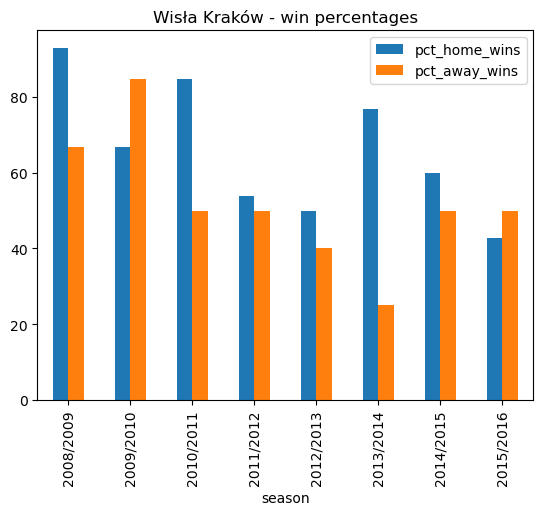

In [32]:
# Run an SQl query using COUNT CASE WHEN to extract % of home and away games won
wisla_krakow_win_pct = pd.read_sql_query('''SELECT season, 
                                         ROUND(AVG(CASE WHEN home_team_api_id = 10265 AND home_team_goal > away_team_goal THEN 1 
                                                   WHEN home_team_api_id = 10265 AND home_team_goal < away_team_goal THEN 0 END)*100,2) AS pct_home_wins, 
                                         ROUND(AVG(CASE WHEN away_team_api_id = 10265 AND away_team_goal > home_team_goal THEN 1 
                                                   WHEN away_team_api_id = 10265 AND away_team_goal < home_team_goal THEN 0 END)*100,2) AS pct_away_wins 
                                         FROM Match 
                                         GROUP BY season'''
                                         ,con)

# Plot a bar plot showing % of home and away wins for each season
wisla_krakow_win_pct.plot.bar(x='season', stacked=False, title ='Wisła Kraków - win percentages')

In [33]:
wisla_krakow_win_pct

,season,pct_home_wins,pct_away_wins
0,2008/2009,92.86,66.67
1,2009/2010,66.67,84.62
2,2010/2011,84.62,50.00
3,2011/2012,53.85,50.00
4,2012/2013,50.00,40.00
5,2013/2014,76.92,25.00
6,2014/2015,60.00,50.00
7,2015/2016,42.86,50.00


In the early part of the period of study, Wisła Kraków had a reputation of being a tough nut to crack at home. They won the league in 2008/2009, winning just under 93% of their home matches! They also had a high degreee of success on the road, winning two thirds of their away matches. They won the league again 2010/2011 with a lower percentage of wins.

#### Points make prizes

<AxesSubplot: title={'center': 'Wisła Kraków - total points'}, xlabel='season'>

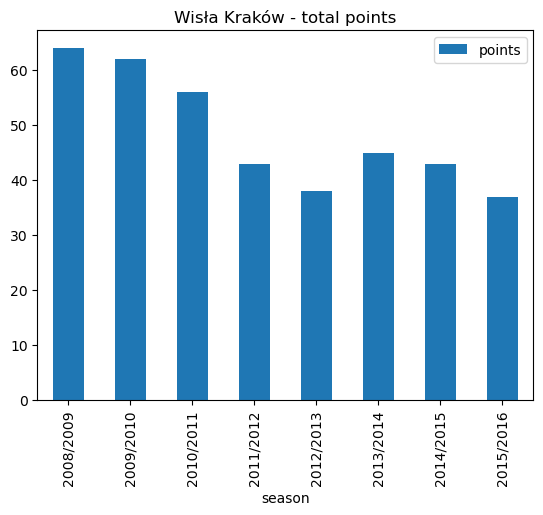

In [45]:
# Run an SQl query using COUNT CASE WHEN to extract home and away games won,lost, and drawn
wisla_krakow_points =  pd.read_sql_query('''SELECT season, 
                                              COUNT(CASE WHEN home_team_api_id = 10265 AND home_team_goal > away_team_goal THEN id END) AS home_wins, 
                                              COUNT(CASE WHEN away_team_api_id = 10265 AND away_team_goal > home_team_goal THEN id END) AS away_wins, 
                                              COUNT(CASE WHEN home_team_api_id = 10265 AND home_team_goal = away_team_goal THEN id END) AS home_draws, 
                                              COUNT(CASE WHEN away_team_api_id = 10265 AND away_team_goal = home_team_goal THEN id END) AS away_draws, 
                                              COUNT(CASE WHEN home_team_api_id = 10265 AND home_team_goal < away_team_goal THEN id END) AS home_defeats, 
                                              COUNT(CASE WHEN away_team_api_id = 10265 AND away_team_goal < home_team_goal THEN id END) AS away_defeats 
                                              FROM Match 
                                              GROUP BY season'''
                                              ,con)

# Calculate points - 3 for a win, 1 for a draw, 0 for a loss
wisla_krakow_points["points"] = wisla_krakow_points['home_wins'] * 3 +  wisla_krakow_points['away_wins'] * 3 + wisla_krakow_points['home_draws'] + wisla_krakow_points['away_draws']
wisla_krakow_points = wisla_krakow_points[["season","points"]]

# Plot a bar plot showing total points for each season
wisla_krakow_points.plot.bar(x='season', stacked=False, title ='Wisła Kraków - total points')

In [46]:
wisla_krakow_points

,season,points
0,2008/2009,64
1,2009/2010,62
2,2010/2011,56
3,2011/2012,43
4,2012/2013,38
5,2013/2014,45
6,2014/2015,43
7,2015/2016,37


Wisła Kraków won the league in 2008/2009 with 64 points but 62 points the following year was only good enough for second place (behind a Robert Lewandowski inspired Lech Poznań). Only 56 points were needed to win the league in 2010/2011. 

#### Final standings

Let's add an extra column for league position data:

In [47]:
# Create an extra column and insert into our original points DataFrame
wisla_krakow_points.insert(0,"Position",[1,2,1,7,7,5,5,11],True)

<AxesSubplot: title={'center': 'Wisła Kraków - final league position'}, ylabel='season'>

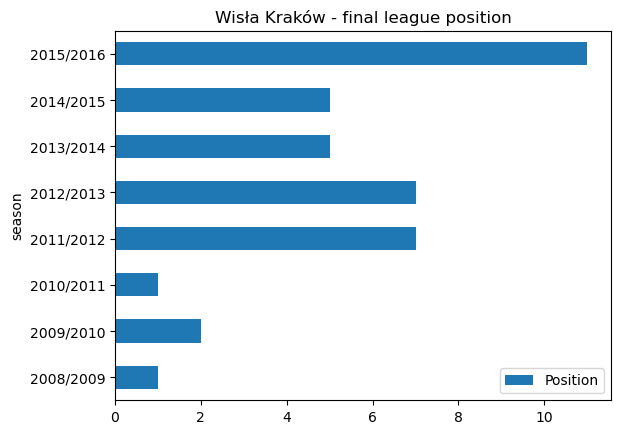

In [48]:
# Plot a horizontal bar plot of league position
wisla_krakow_points.plot.barh(x='season', y='Position', title ='Wisła Kraków - final league position')

In [49]:
wisla_krakow_position = wisla_krakow_points[["season","points"]]

,Position,season,points
0,1,2008/2009,64
1,2,2009/2010,62
2,1,2010/2011,56
3,7,2011/2012,43
4,7,2012/2013,38
5,5,2013/2014,45
6,5,2014/2015,43
7,11,2015/2016,37


The general trend for Wisła Kraków is one of decline. They have struggled since the heights of 2008/2009 to 2010/2011 where they were placed 1, 2, 1, finishing 11th in 2015/2016.

### 2016/2017 to 2021/2022

The European Soccer Database is now somewhat out of date, so I decided to gather data for seasons 2016/2017 to 2021/2022 and create dictionaries for conversion to DataFrames.

#### Gooooooooooool !

In [7]:
# Create a dictionary for the most recent years
wisla_recent = {'season': ['2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021','2021/2022'],
        'goals_scored': [45, 41, 55, 37, 39, 37],
        'goals_conceded': [46, 36, 48, 47,42, 54],
        'games_won': [13, 12, 12, 10, 8, 7],
        'games_lost': [12, 10, 12, 15, 13, 17],
        'games_drawn': [5, 8, 6, 5, 9, 10],
         'points':[44, 44, 42, 35, 33, 31],
         'position':[5, 7, 9, 13, 13, 17]
        } 

# Convert dictionary to a DataFrame
wisla_recent = pd.DataFrame.from_dict(wisla_recent)  

<AxesSubplot: title={'center': 'Wisła Kraków - goals for and against'}, xlabel='season'>

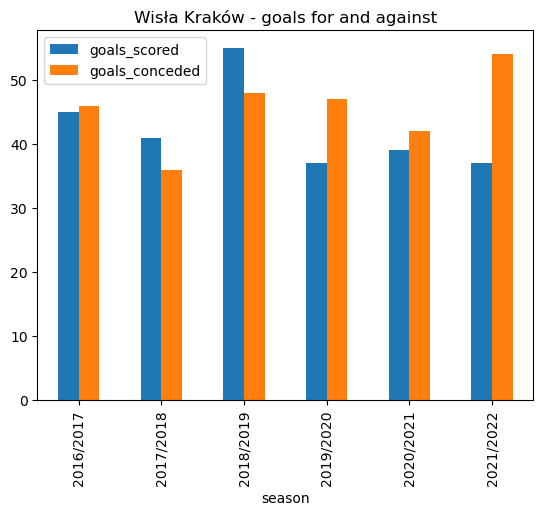

In [8]:
# Filter for columns to be plotted
wisla_recent_goals = wisla_recent[['season','goals_scored','goals_conceded',]]

# Plot a bar plot showing goals scored and conceded each season
wisla_recent_goals.plot.bar(x='season', stacked=False, title ='Wisła Kraków - goals for and against')

In [9]:
wisla_recent_goals

,season,goals_scored,goals_conceded
0,2016/2017,45,46
1,2017/2018,41,36
2,2018/2019,55,48
3,2019/2020,37,47
4,2020/2021,39,42
5,2021/2022,37,54


Wisła Kraków leaked 54 goals in the 2021/2022 season which was enough to see them relegated to the 2nd tier of Polish football.

#### Win, lose or draw

<AxesSubplot: title={'center': 'Wisła Kraków - win, draw, lose'}, xlabel='season'>

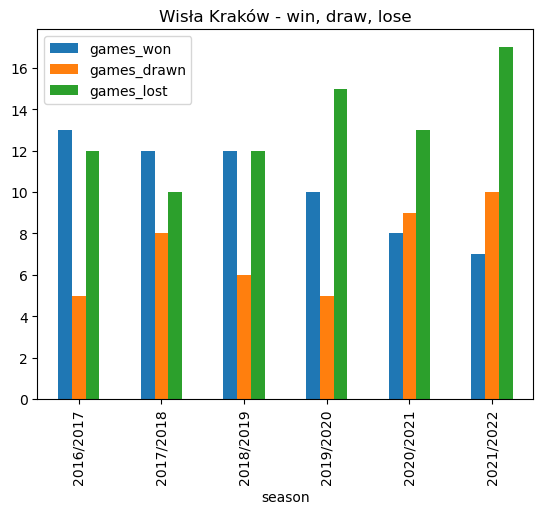

In [55]:
# Filter for columns to be plotted
wisla_recent_wins = wisla_recent[['season','games_won','games_drawn','games_lost']]

# Plot a bar plot showing goals won, lost, and drawn each season
wisla_recent_wins.plot.bar(x='season', stacked=False, title ='Wisła Kraków - win, draw, lose')

In [56]:
wisla_recent_wins

,season,games_won,games_drawn,games_lost
0,2016/2017,13,5,12
1,2017/2018,12,8,10
2,2018/2019,12,6,12
3,2019/2020,10,5,15
4,2020/2021,8,9,13
5,2021/2022,7,10,17


Wisła Kraków lost 17 out of 34 games in the 2021/2022 season which contributed to their relegation to the 2nd tier of Polish football.

#### Points make prizes

<AxesSubplot: title={'center': 'Wisła Kraków - total points'}, xlabel='season'>

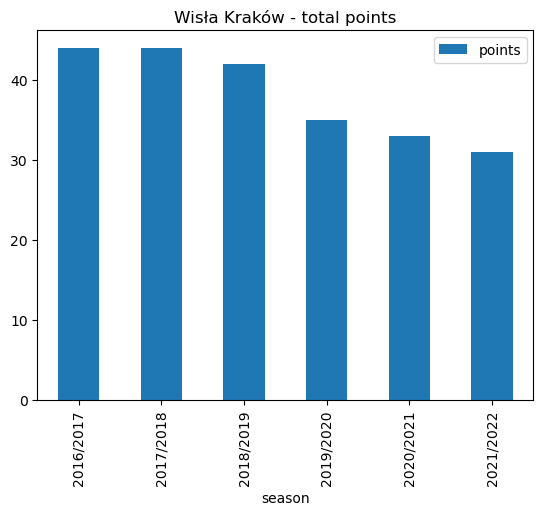

In [58]:
# Filter for columns to be plotted
wisla_recent_points = wisla_recent[['season','points']]

# Plot a bar plot showing total points for each season
wisla_recent_points.plot.bar(x='season', stacked=False, title ='Wisła Kraków - total points')

In [59]:
wisla_recent_points

,season,points
0,2016/2017,44
1,2017/2018,44
2,2018/2019,42
3,2019/2020,35
4,2020/2021,33
5,2021/2022,31


As we can see. there was a steady decline in point totals from 2018/2019 onwards. Wisła Kraków accumulated just 31 points from their 34 matches in the 2021/2022 season which was not enough to retain their top flight status.

#### Final standings

<AxesSubplot: title={'center': 'Wisła Kraków - final league position'}, ylabel='season'>

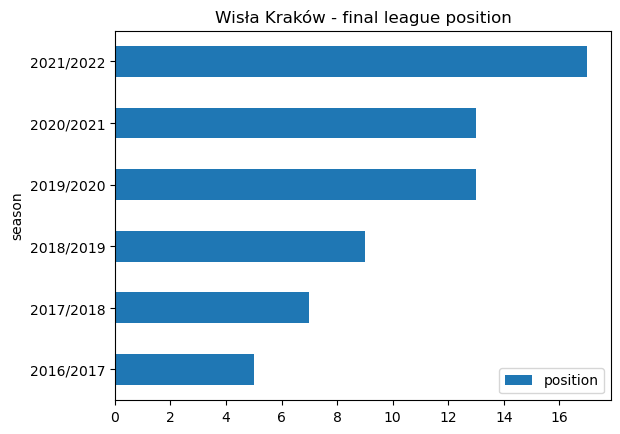

In [42]:
# Plot a horizontal bar plot of league position
wisla_recent.plot.barh(x='season', y='position', title ='Wisła Kraków - final league position')

In [68]:
wisla_position = wisla_recent[["season","position"]]
wisla_position 

,season,position
0,2016/2017,5
1,2017/2018,7
2,2018/2019,9
3,2019/2020,13
4,2020/2021,13
5,2021/2022,17


The decline in points totals is mirrored by a declining league position. Wisła Kraków accumulated just 31 points from their 34 matches in the 2021/2022 season and were relegated.

### 2022/2023

The second tier I Liga table for 2022/2023 at the time of writing is shown below. The season is on hold as the FIFA World Cup - Qatar 2022 progresses.  Wisła Kraków are languishing mid table. A long way away from the dizzy heights of the Ekstraklasa championship winning side of 2010/2011.

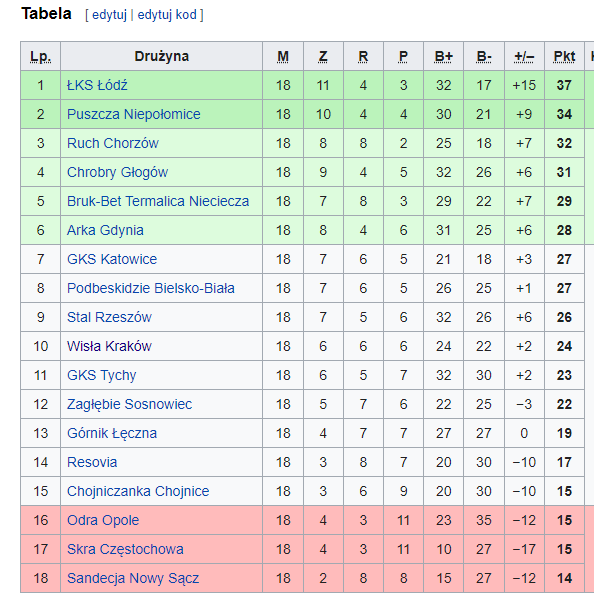

## KS Cracovia

<img src="cracovia strip.jpg"  width="200" height ="200"/>

### 2008/2009 to 2015/2016

#### Gooooooooooool !

<AxesSubplot: title={'center': 'KS Cracovia - goals for and against'}, xlabel='season'>

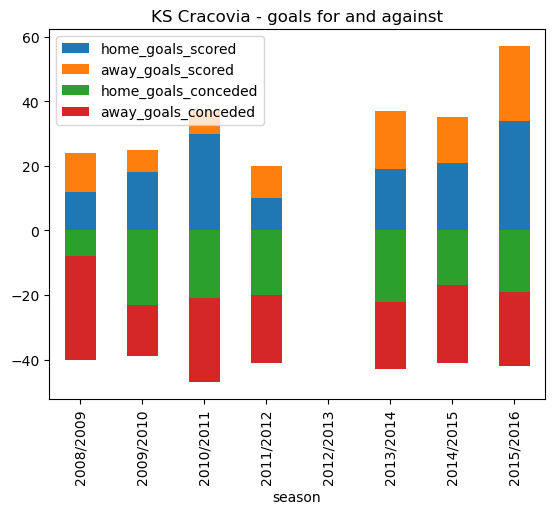

In [71]:
# Now that we already have the query structure in place, we can simply replace the home_team_api_id with that for Cracovia - 2186
cracovia_goals = pd.read_sql_query('''SELECT season, 
                                   ROUND(SUM(CASE WHEN home_team_api_id = 2186 THEN home_team_goal END),2) AS home_goals_scored, 
                                   ROUND(SUM(CASE WHEN away_team_api_id = 2186 THEN away_team_goal END),2) AS away_goals_scored, 
                                   SUM(CASE WHEN home_team_api_id = 2186 THEN away_team_goal END)*-1 AS home_goals_conceded, 
                                   SUM(CASE WHEN away_team_api_id = 2186 THEN home_team_goal END)*-1 AS away_goals_conceded 
                                   FROM Match 
                                   GROUP BY season'''
                                   ,con)

# Plot a stacked bar plot showing home and away goals scored and conceded each season
cracovia_goals.plot.bar(x='season', stacked=True, title ='KS Cracovia - goals for and against')

In [45]:
cracovia_goals 

,season,home_goals_scored,away_goals_scored,home_goals_conceded,away_goals_conceded
0,2008/2009,12.0,12.0,-8.0,-32.0
1,2009/2010,18.0,7.0,-23.0,-16.0
2,2010/2011,30.0,7.0,-21.0,-26.0
3,2011/2012,10.0,10.0,-20.0,-21.0
4,2012/2013,NaN,NaN,NaN,NaN
5,2013/2014,19.0,18.0,-22.0,-21.0
6,2014/2015,21.0,14.0,-17.0,-24.0
7,2015/2016,34.0,23.0,-19.0,-23.0


Interestingly, we have a ***Not a Number (NaN)*** reference for season 2012/2013. On follow up it transpires that KS Cracovia finished bottom of the Ekstraklasa in 2011/2012 (as we can see above they only scored 20 goals in total that season) and were relegated to the ***I liga***, the second tier of Polish football. They made an immediate return and the 37 goals scored in 2013/2014 was enough to secure them a repectable 9th spot out of 16. They scored 57 goals in 2015/2016 (finishing 5th), a goal tally only bettered by champions Legia Warszawa.

#### Goal difference

<AxesSubplot: title={'center': 'KS Cracovia - goal difference'}, xlabel='season'>

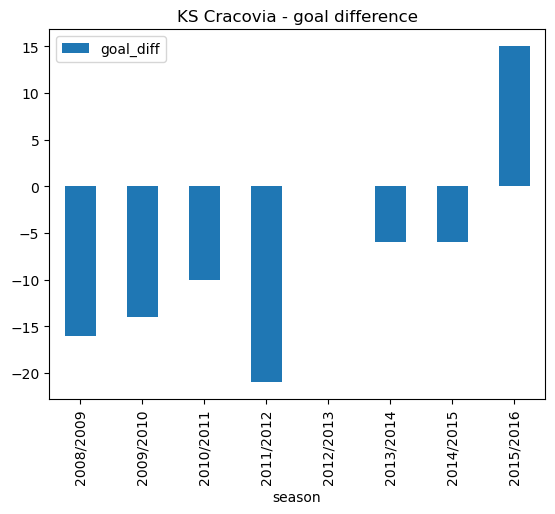

In [72]:
# Add a goal difference column to the cracovia_goals DataFrame
cracovia_goals["goal_diff"] = cracovia_goals["home_goals_scored"] + cracovia_goals["away_goals_scored"] + cracovia_goals["home_goals_conceded"] + cracovia_goals["away_goals_conceded"] 

# Select the season and goal difference columns and plot
cracovia_goal_diff = cracovia_goals[["season", "goal_diff"]]
cracovia_goal_diff.plot.bar(x='season', stacked=False, title ='KS Cracovia - goal difference')

In [47]:
cracovia_goal_diff

,season,goal_diff
0,2008/2009,-16.0
1,2009/2010,-14.0
2,2010/2011,-10.0
3,2011/2012,-21.0
4,2012/2013,NaN
5,2013/2014,-6.0
6,2014/2015,-6.0
7,2015/2016,15.0


As noted before, we have no data for 2012/2013 as KS Cracovia were relegated in 2011/2012. A goal difference of -21 highlights the poor performance that year. For all the years of study (with the exception of 2015/2016 where they finished 5th) KS Cracovia conceded more goals than they scored.

#### You win some, you lose some

<AxesSubplot: title={'center': 'KS Cracovia - games won and lost'}, xlabel='season'>

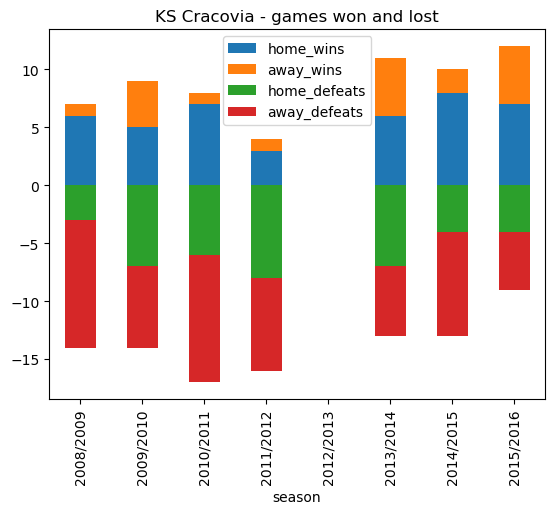

In [73]:
# Run an SQl query using COUNT CASE WHEN to extract home and away games won and lost
cracovia_wins_losses =  pd.read_sql_query('''SELECT season, 
                                          COUNT(CASE WHEN home_team_api_id = 2186 AND home_team_goal > away_team_goal THEN id END) AS home_wins, 
                                          COUNT(CASE WHEN away_team_api_id = 2186 AND away_team_goal > home_team_goal THEN id END) AS away_wins, 
                                          COUNT(CASE WHEN home_team_api_id = 2186 AND home_team_goal < away_team_goal THEN id END) AS home_defeats, 
                                          COUNT(CASE WHEN away_team_api_id = 2186 AND away_team_goal < home_team_goal THEN id END) AS away_defeats 
                                          FROM Match 
                                          GROUP BY season'''
                                          ,con)


# Convert defeats to a negative value - multiply by -1 to allow bi-directional plotting
cracovia_wins_losses.home_defeats = cracovia_wins_losses.home_defeats * -1
cracovia_wins_losses.away_defeats = cracovia_wins_losses.away_defeats * -1

# Plot a stacked bar plot showing home and away wins and defeats each season
cracovia_wins_losses.plot.bar(x='season', stacked=True, title ='KS Cracovia - games won and lost')

In [49]:
cracovia_wins_losses

,season,home_wins,away_wins,home_defeats,away_defeats
0,2008/2009,6,1,-3,-11
1,2009/2010,5,4,-7,-7
2,2010/2011,7,1,-6,-11
3,2011/2012,3,1,-8,-8
4,2012/2013,0,0,0,0
5,2013/2014,6,5,-7,-6
6,2014/2015,8,2,-4,-9
7,2015/2016,7,5,-4,-5


From the above stacked bar chart we can see a downward trend from 2009/2010 culminating in KS Cracovia being relegated in 2011/2012, with only 4 wins all season. After their return in 2013/2014 they seem to have consolidated. During the period of study KS Cracovia generally lost more games than they won, with the exception of 2015/2016 where they finished the season in a very respectable 5th place.

#### Home advantage?

<AxesSubplot: title={'center': 'KS Cracovia - win percentages'}, xlabel='season'>

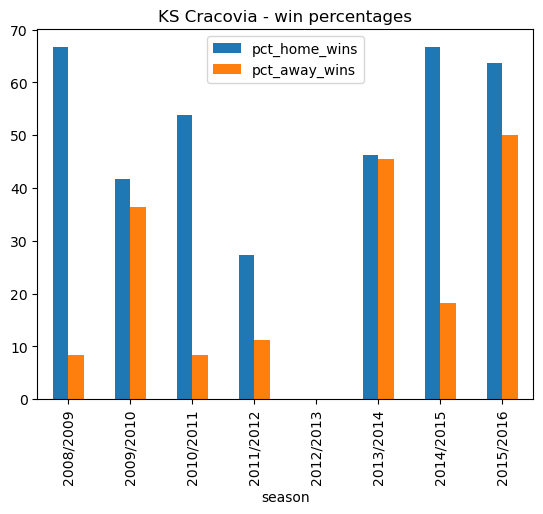

In [74]:
# Run an SQl query using AVG CASE WHEN to extract % of home and away games won
cracovia_win_pct = pd.read_sql_query('''SELECT season, 
                                     ROUND(AVG(CASE WHEN home_team_api_id = 2186 AND home_team_goal > away_team_goal THEN 1 
                                               WHEN home_team_api_id = 2186 AND home_team_goal < away_team_goal THEN 0 END)*100,2) AS pct_home_wins, 
                                     ROUND(AVG(CASE WHEN away_team_api_id = 2186 AND away_team_goal > home_team_goal THEN 1 
                                               WHEN away_team_api_id = 2186 AND away_team_goal < home_team_goal THEN 0 END)*100,2) AS pct_away_wins 
                                     FROM Match 
                                     GROUP BY season'''
                                     ,con)

# Plot a bar plot showing % of home and away wins for each season
cracovia_win_pct.plot.bar(x='season', stacked=False, title ='KS Cracovia - win percentages')

In [51]:
cracovia_win_pct

,season,pct_home_wins,pct_away_wins
0,2008/2009,66.67,8.33
1,2009/2010,41.67,36.36
2,2010/2011,53.85,8.33
3,2011/2012,27.27,11.11
4,2012/2013,NaN,NaN
5,2013/2014,46.15,45.45
6,2014/2015,66.67,18.18
7,2015/2016,63.64,50.00


In the case of KS Cracovia, home advantage certainly seems to be a factor. For an in-depth study of home advantage in European Football Leagues see [this article](https://www.mdpi.com/2227-9091/8/3/87).

#### Points make prizes

<AxesSubplot: title={'center': 'KS Cracovia - total points'}, xlabel='season'>

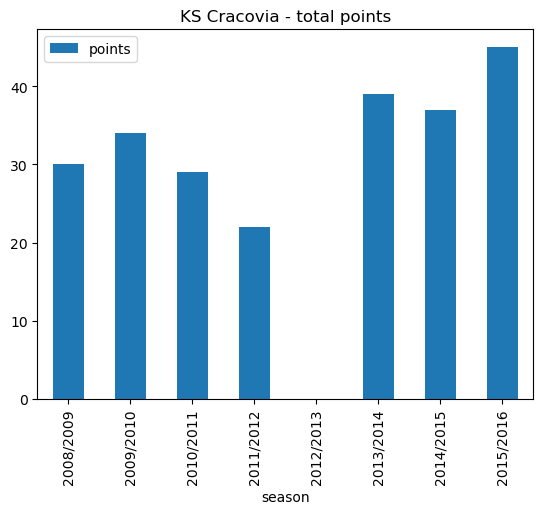

In [75]:
# Run an SQl query using COUNT CASE WHEN to extract home and away games won,lost, and drawn
cracovia_points =  pd.read_sql_query('''SELECT season, 
                                              COUNT(CASE WHEN home_team_api_id = 2186 AND home_team_goal > away_team_goal THEN id END) AS home_wins, 
                                              COUNT(CASE WHEN away_team_api_id = 2186 AND away_team_goal > home_team_goal THEN id END) AS away_wins, 
                                              COUNT(CASE WHEN home_team_api_id = 2186 AND home_team_goal = away_team_goal THEN id END) AS home_draws, 
                                              COUNT(CASE WHEN away_team_api_id = 2186 AND away_team_goal = home_team_goal THEN id END) AS away_draws, 
                                              COUNT(CASE WHEN home_team_api_id = 2186 AND home_team_goal < away_team_goal THEN id END) AS home_defeats, 
                                              COUNT(CASE WHEN away_team_api_id = 2186 AND away_team_goal < home_team_goal THEN id END) AS away_defeats 
                                              FROM Match 
                                              GROUP BY season'''
                                              ,con)

# Calculate points total for each season - 3 for a win, 1 for a draw, 0 for a loss
cracovia_points["points"] = cracovia_points['home_wins'] * 3 +  cracovia_points['away_wins'] * 3 + cracovia_points['home_draws'] + cracovia_points['away_draws']

# Filter for the seasom and points columns for plotting
cracovia_points = cracovia_points[["season","points"]]

# Plot a bar plot showing total points for each season
cracovia_points.plot.bar(x='season', stacked=False, title ='KS Cracovia - total points')

In [13]:
cracovia_points

,season,points
0,2008/2009,30
1,2009/2010,34
2,2010/2011,29
3,2011/2012,22
4,2012/2013,0
5,2013/2014,39
6,2014/2015,37
7,2015/2016,45


Cracovia were relegated in 2011/2012 with 22 points.


#### Final standings

In [76]:
# Create an extra column and insert into our original points DataFrame
cracovia_points.insert(0,"Position",[14,12,14,16,0,9,12,5],True)


<AxesSubplot: title={'center': 'KS Cracovia - final league position'}, ylabel='season'>

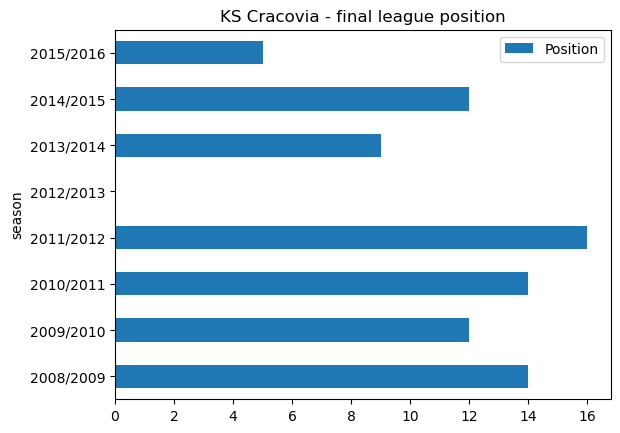

In [77]:
# Plot a horizontal bar plot of league position
cracovia_points.plot.barh(x='season', y='Position', title ='KS Cracovia - final league position')

In [52]:
cracovia_position = cracovia_points
cracovia_position 

,Position,season,points
0,14,2008/2009,30
1,12,2009/2010,34
2,14,2010/2011,29
3,16,2011/2012,22
4,0,2012/2013,0
5,9,2013/2014,39
6,12,2014/2015,37
7,5,2015/2016,45


As we can see the trend for KS Cracovia is better since they returned to the Ekstraklasa in 2013/2014. They finished a respectable 9th on their first season back in the top league, and finished in 5th place in 2015/2016.

### 2016/2017 to 2021/2022

The European Soccer Database is now somewhat out of date, so I decided to gather data for seasons 2016/2017 to 2021/2022 and create dictionaries for conversion to DataFrames.

#### Gooooooooooool !

In [23]:
# Create a dictionary for the most recent years
cracovia_recent = {'season': ['2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021','2021/2022'],
        'goals_scored': [38, 40, 39, 39,28,40],
        'goals_conceded': [43, 40, 34, 29,32,42],
        'games_won': [6, 10, 14, 14,8,12],
        'games_lost': [11, 11, 10, 12,9,12],
        'games_drawn': [13,9,6,4,13,10],
        'points':[31,39,48,46,32,46],
        'position':[13,10,4,5,14,9]
        } 

# Convert dictionary to a DataFrame
cracovia_recent = pd.DataFrame.from_dict(cracovia_recent)


<AxesSubplot: title={'center': 'KS Cracovia - goals for and against'}, xlabel='season'>

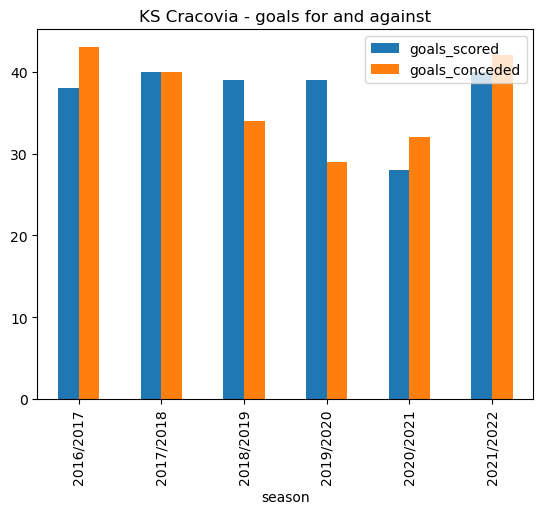

In [78]:
# Filter for columns to be plotted
cracovia_recent_goals = cracovia_recent[['season','goals_scored','goals_conceded',]]

# Plot a bar plot showing goals scored and conceded each season
cracovia_recent_goals.plot.bar(x='season', stacked=False, title ='KS Cracovia - goals for and against')


In [25]:
cracovia_recent_goals

,season,goals_scored,goals_conceded
0,2016/2017,38,43
1,2017/2018,40,40
2,2018/2019,39,34
3,2019/2020,39,29
4,2020/2021,28,32
5,2021/2022,40,42


In the last couple of years KS Cracova have conceded more than they have scored, although they seem to have added extra fire power up front in 2021/2022 with 40 goals scored compared to only 28 in 2020/2021.

#### Win, lose or draw

<AxesSubplot: title={'center': 'KS Cracovia - win, draw, lose'}, xlabel='season'>

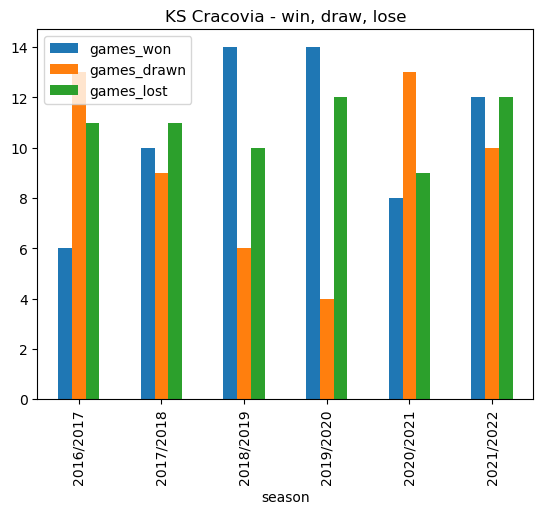

In [79]:
# Filter for columns to be plotted
cracovia_recent_wins = cracovia_recent[['season','games_won','games_drawn','games_lost']]

# Plot a bar plot showing goals won, lost, and drawn each season
cracovia_recent_wins.plot.bar(x='season', stacked=False, title ='KS Cracovia - win, draw, lose')

In [67]:
cracovia_recent_wins

,season,games_won,games_drawn,games_lost
0,2016/2017,6,13,11
1,2017/2018,10,9,11
2,2018/2019,14,6,10
3,2019/2020,14,4,12
4,2020/2021,8,13,9
5,2021/2022,12,10,12


KS Cracovia performed very well in 2018/2019 and 2019/2020. Season 2021/2022 was a year of consolidation, with an almost even split of wins, draws, and losses.

#### Points make prizes

<AxesSubplot: title={'center': 'KS Cracovia - total points'}, xlabel='season'>

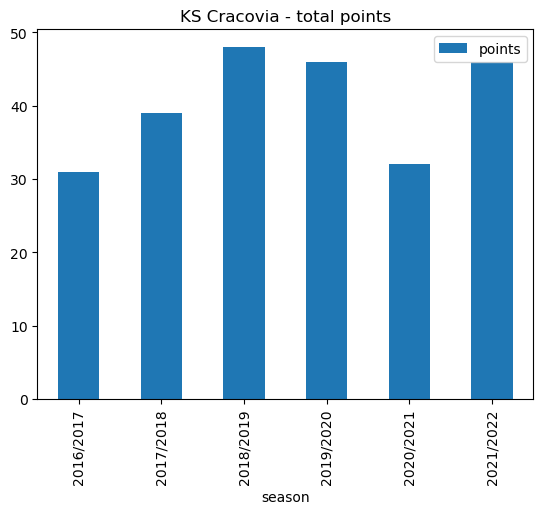

In [80]:
# Filter for columns to be plotted
cracovia_recent_points = cracovia_recent[['season','points']]


# Plot a bar plot showing total points for each season
cracovia_recent_points.plot.bar(x='season', stacked=False, title ='KS Cracovia - total points')

In [29]:
cracovia_recent_points

,season,points
0,2016/2017,31
1,2017/2018,39
2,2018/2019,48
3,2019/2020,46
4,2020/2021,32
5,2021/2022,46


::: {.callout-note}
- The points total of 32 for season 2020/2021 is net of a 5 point deduction imposed for corrupt activity backdated from the 2003/2004 season
- The number of league games played increased to 34 for season 2021/2022 due to league reconstruction
:::

#### Final standings

<AxesSubplot: title={'center': 'KS Cracovia - final league position'}, ylabel='season'>

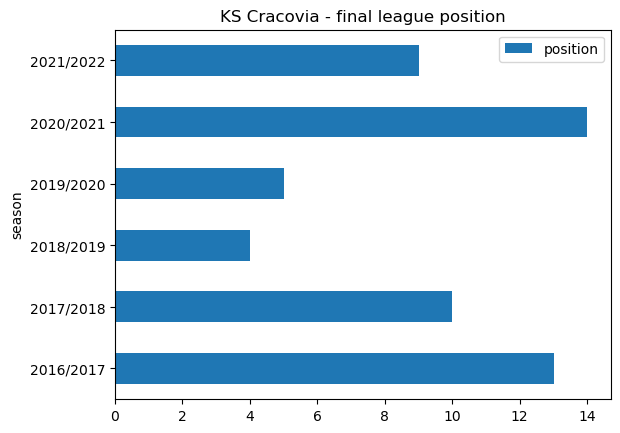

In [81]:
# Plot a horizontal bar plot of league position
cracovia_recent.plot.barh(x='season', y='position', title ='KS Cracovia - final league position')

In [66]:
cracovia_position = cracovia_recent[["season","position"]]
cracovia_position 

,season,position
0,2016/2017,13
1,2017/2018,10
2,2018/2019,4
3,2019/2020,5
4,2020/2021,14
5,2021/2022,9


Mixed fortunes for KS Cracovia, an improvement from 2016/2017 and a 4th place finish in 2018/2019. Snce then things have tailed off somewhat.

### 2022/2023

The Ekstraklasa league table for 2022/2023 at the time of writing is shown below. The season is on hold as the FIFA World Cup - Qatar 2022 progresses.  KS Cracovia are sitting in 8th place, just four points behind Widzew and Pogon Szczecin in 3rd and 4th place respectively. Raków Częstochowa have a 9 point lead at the top of the table over nearest challengers Legia Warsaw.

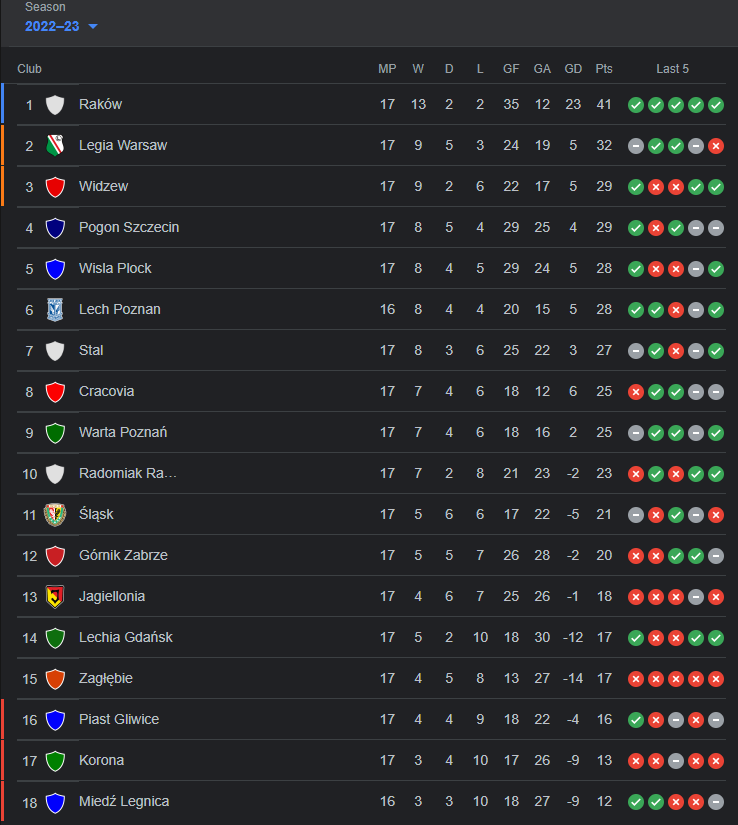!

## Key takeaways

When I first had the idea for this project I did not know if it was even possible to run SQL queries using Python within JupyterLab. This was a very satisfying project as it opens up the possibility of further project ideas using data stored within a database. The combined power of SQL and Python is formidable, and allows data which is stored in different locations and different formats to be pulled together, cleaned, manipulated, filtered and presented graphically in a way that produces meaningful insights, and facilitates data-driven decision making. 